# Overview
We will be using Python as our programming language, and making use of some popular python machine learning and data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We'll use seaborn and matplotlib for visualizations. We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build our classification model. Lastly, we will use joblib available in sklearn to save our model for future use.



In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
 
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

# Data Description
We have our data saved in a CSV file called diabetes.csv. We first read our dataset in a pandas dataframe called diabetesDF, and then use the head(2) function to show the first two records from our dataset.



In [72]:
data_path = '~/intro_to_machine_learning'

In [73]:
diabetesdf = pd.read_csv(data_path+ '/diabetes.csv')

In [74]:
diabetesdf.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


The following features have been provided to help us predict whether a person is diabetic or not:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [75]:
diabetesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Let's also make sure that our data is clean (has no null values, etc).
We create a missing values variable and we first find out the shape of our dataset to get
the number of rows and columns

In [76]:
diabetesdf.shape

(768, 9)

In [77]:
missing_values_count = diabetesdf.isnull().sum()
missing_values_count[0:9]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We do not have any nan values in a dataset

# Data Exploration
Let us now explore our data set to get a feel of what it looks like and get some insights about it.

Let's start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

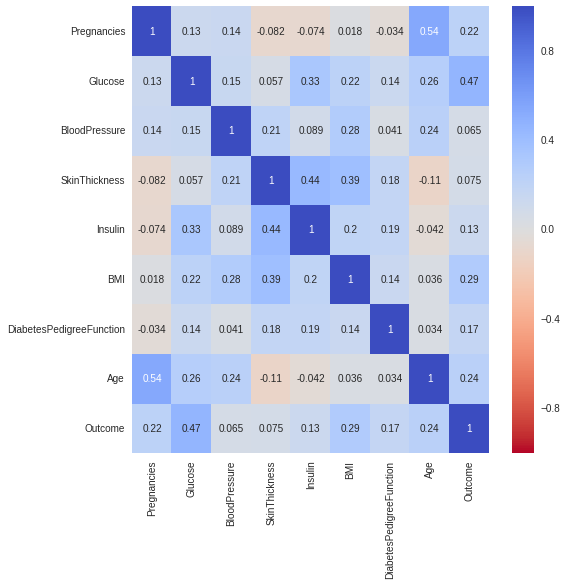

In [78]:
corr_full = diabetesdf[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']].corr()
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr_full, annot = True, cmap = 'coolwarm_r')
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

In the above heatmap, blue darker colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

Let's also look at how many people in the dataset are diabetic and how many are not. Below is the barplot of the same:

(array([0, 1]), <a list of 2 Text xticklabel objects>)

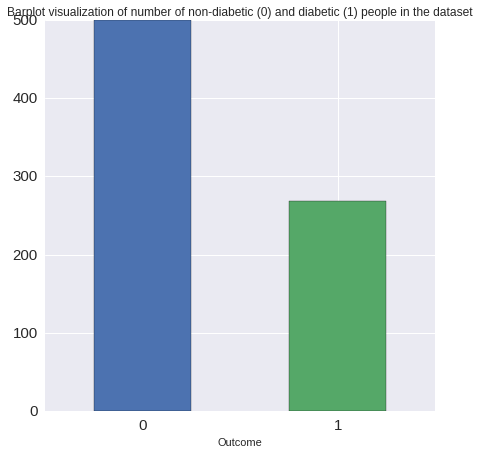

In [79]:
plt.figure()
diabetesdf.groupby('Outcome')['Outcome'].count().plot(kind="bar", y="Count", title='Barplot visualization of number of non-diabetic (0) and diabetic (1) people in the dataset', fontsize=15, figsize=(7, 7))
plt.xticks(rotation=360)

It is also helpful to visualize relations between a single variable and the outcome. Below, we'll see the relation between age and outcome. You can similarly visualize other feature. The figure is a plot of the mean age for each of the output classes. We can see that the mean age of people having diabetes is higher.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

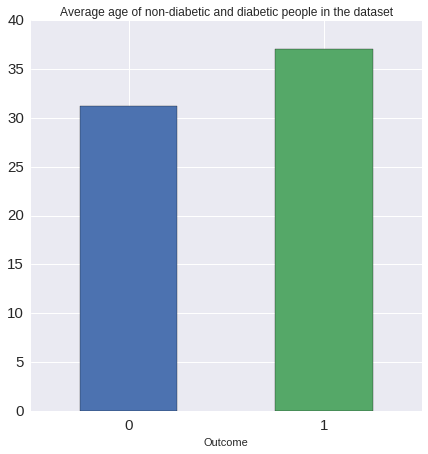

In [80]:
plt.figure()
diabetesdf.groupby('Outcome')['Age'].mean().plot(kind="bar", y="Age", title='Average age of non-diabetic and diabetic people in the dataset', fontsize=15, figsize=(7, 7))
plt.xticks(rotation=360)

# Dataset preparation (splitting and normalization)
When using machine learning algorithms we should always split our data into a training set and test set. (If the number of experiments we are running is large, then we can should be dividing our data into 3 parts, namely - training set, development set and test set). In our case, we will also separate out some data for manual cross checking.

The data set consists of record of 767 patients in total. To train our model we will be using 650 records. We will be using 100 records for testing, and the last 17 records to cross check our model.

In [81]:
dfTrain = diabetesdf[:650]
dfTest = diabetesdf[650:750]
dfCheck = diabetesdf[750:] 

Next, we separate the label and features (for both training and test dataset). In addition to that, we will also convert them into NumPy arrays as our machine learning algorithm process data in NumPy array format.

In [82]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

As the final step before using machine learning, we will normalize our inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier for us to understand the importance of each feature later, when we'll be looking at the model weights. We'll normalize the data such that each variable has 0 mean and standard deviation of 1.

In [83]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
 
trainData = (trainData - means)/stds
testData = (testData - means)/stds
 
# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1

# Training and Evaluating Machine Learning Model
We can now train our classification model. We'll be using a machine simple learning model called logistic regression. Since the model is readily available in sklearn, the training process is quite easy and we can do it in few lines of code. First, we create an instance called diabetesCheck and then use the fit function to train the model.

In [84]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Next, we will use our test data to find out accuracy of the model.

In [85]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

('accuracy = ', 78.0, '%')


# Interpreting the ML model
To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect.

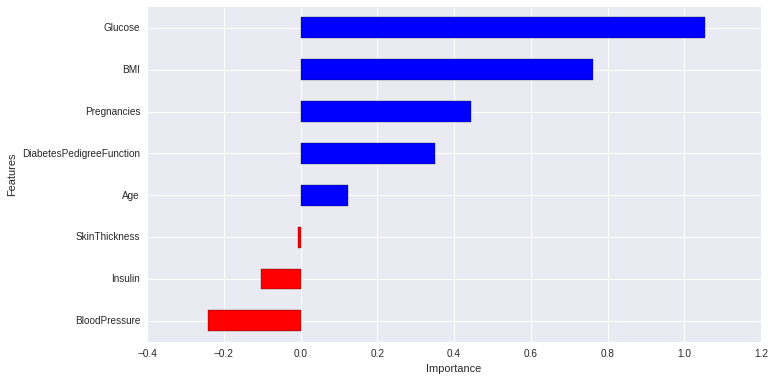

In [87]:
coeff = list(diabetesCheck.coef_[0])
labels = list (dfTrain.drop ('Outcome', 1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, we can draw the following conclusions.

1. Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!

2. Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).

3. Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that our input data is normalized. Without that, we can't claim that importance is proportional to weights.



# Save Model
Now we will save our trained model for future use using joblib.

In [88]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

To check whether we have saved the model properly or not, we will use our test data to check the accuracy of our saved model (we should observe no change in accuracy if we have saved it properly).

In [89]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

('accuracy = ', 78.0, '%')


# Predicting using the model
We will now use our unused data to see how predictions can be made. We have our unused data in dfCheck.

In [90]:
dfCheck.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0


We will now use the first record to make our prediction.

In [91]:
sampleData = dfCheck[:1]
 
# prepare sample  
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
 
# predict 
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

('Probability:', array([[0.4385153, 0.5614847]]))
('prediction:', array([1]))


The first element of array predictionProbability 0.438 is the probability of the class being 0 and second element 0.561 is the probability of the class being 1. The probability sum up to 1. As we can see that the 1 is more probable class, we get [1] as our prediction, which means that the model predicts that the person has diabetes.